In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
#import pandas_profiling

In [2]:
data_hos=pd.read_csv("Z:\\December_2019_Batch\\Simulation Project ML\\Dataset\\Classification\\Household\\Dataset.csv")

C:\Users\DS7_ASivaram\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (95,100,101,102) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#data_null=pd.DataFrame(data_hos.isnull().sum())


In [4]:
data_hos.isnull().sum().sum()

230083

In [5]:
data_hos["Target"].isnull().sum()

1965

In [6]:
#data_null.to_excel("full_null.xls")

#EXPLORATORY DATA ANALYSIS AND PREPROCESSING OF DATA

In [7]:
#ANALYSIS OF TARGET VARIABLE

Text(0.5, 1.0, 'Target classes')

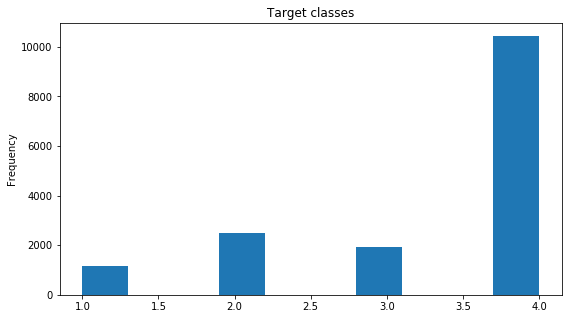

In [8]:
plt.figure(figsize=(9,5))
data_hos['Target'].plot(kind ="hist") 
plt.title('Target classes')


1 = extreme poverty 
2 = moderate poverty 
3 = vulnerable households 
4 = non vulnerable households


In [9]:
#ANALYSING THE RENT VARIABLE "v2a1"

C:\Users\DS7_ASivaram\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
C:\Users\DS7_ASivaram\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexes\base.py:2897: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_loc(key)


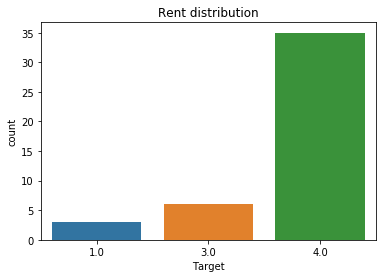

In [10]:
#plt.figure(figsize=(9,5))
#data_hos['v2a1'].plot(kind ="hist") 
#plt.title('Rent Price range')
#sns.distplot(data_hos['v2a1'], kde=False, bins=5)
sns.countplot(data_hos.loc[((data_hos['v2a1'])), 'Target'])
plt.title("Rent distribution")
plt.show()


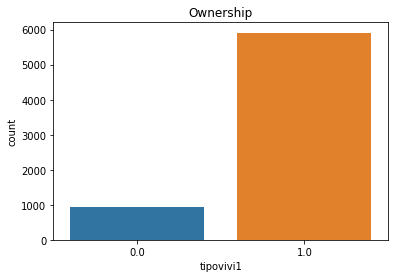

In [11]:
sns.countplot(data_hos.loc[(pd.isnull(data_hos['v2a1'])), 'tipovivi1'])
plt.title("Ownership")
plt.show()

In [12]:
#MORE THAN 90% OF THE NULL VALUES OF V2A1 IS ZERO.SINCE THEY OWN THE HOUSE THEY NO NEED TO PAY RENT.

In [13]:
data_hos.loc[(pd.isnull(data_hos['v2a1']) & data_hos['tipovivi1'] == 1), 'v2a1'] = 0

In [14]:
data_hos['v2a1'].isnull().sum()

950

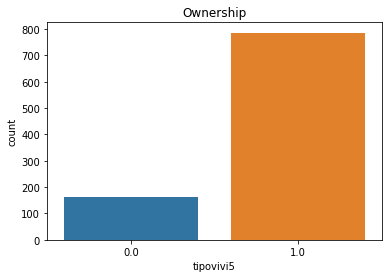

In [15]:
sns.countplot(data_hos.loc[(pd.isnull(data_hos['v2a1'])), 'tipovivi5'])
plt.title("Ownership")
plt.show()

In [16]:
#remaining null values mostly comes for tipovivi5.so taking average of them and filling in null values.

In [17]:
data_hos["tipovivi5"].mean()

0.07262848935240117

In [18]:
#filter1=data_hos['v2a1'].mean()
#filter2=data_hos["tipovivi5"]==0
#data_hos.where(filter1 & filter2, inplace = True) 
means = data_hos.groupby('v2a1')['tipovivi5'].mean()
means

v2a1
0.0          0.0
12000.0      0.0
13000.0      0.0
14000.0      0.0
15000.0      0.0
            ... 
770229.0     0.0
800000.0     0.0
855810.0     0.0
1000000.0    0.0
2353477.0    0.0
Name: tipovivi5, Length: 7879, dtype: float64

In [19]:
data_hos["v2a1"][data_hos['tipovivi5']==1].mean()

66145.33421750664

In [20]:
#data_hos["v2a1"].fillna(66145,inplace=True)
data_hos.loc[(pd.isnull(data_hos['v2a1']) & data_hos['tipovivi5'] == 1), 'v2a1'] = 66145
data_hos["v2a1"].dropna(inplace=True)

In [21]:
data_hos['v2a1'].isnull().sum()

0

In [22]:
#FILLED NULL VALUES OF "V2A1" (RENT COLUMN)

In [23]:
#df1['log_value'] = np.log(df1['University_Rank'])
#data_hos["v2a1"]=np.log1p(data_hos["v2a1"])

In [24]:
#data_hos.head()

In [25]:
count_rent=data_hos.groupby("v2a1").size()
count_rent

v2a1
0.0          5940
12000.0         3
13000.0         4
14000.0         3
15000.0         3
             ... 
770229.0        3
800000.0        4
855810.0       11
1000000.0       7
2353477.0       2
Length: 7880, dtype: int64

Text(0.5, 1.0, 'rent  of extreme poverty ')

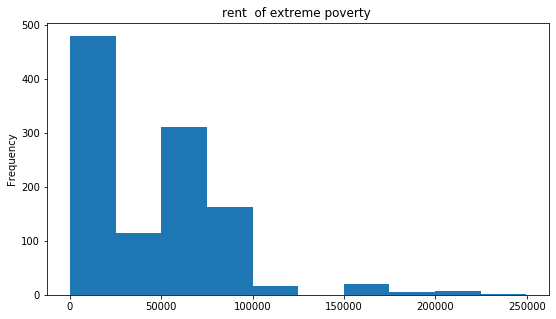

In [26]:
x1=data_hos['v2a1'][data_hos["Target"]==1]
x2=data_hos['v2a1'][data_hos["Target"]==2]
x3=data_hos['v2a1'][data_hos["Target"]==3]
x4=data_hos['v2a1'][data_hos["Target"]==4]
plt.figure(figsize=(9,5))
x1.plot(kind ="hist") 
plt.title('rent  of extreme poverty ')

#y=data_hos["Target"]
#sns.distplot(x,hue=y)
#h=plt.hist(x,y)
#plt.axis([0, 20, 0, 20])
#plt.show()

Text(0.5, 1.0, 'rent of moderate poverty  ')

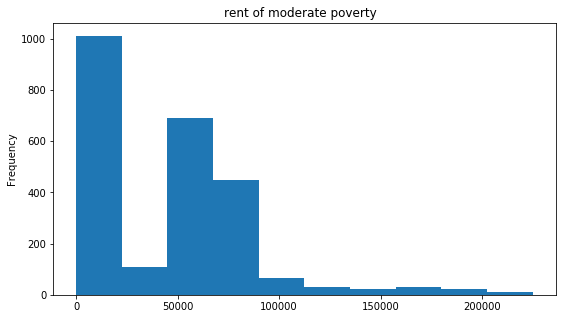

In [27]:
plt.figure(figsize=(9,5))
x2.plot(kind ="hist") 
plt.title('rent of moderate poverty  ')

Text(0.5, 1.0, 'rent of vulnerable households')

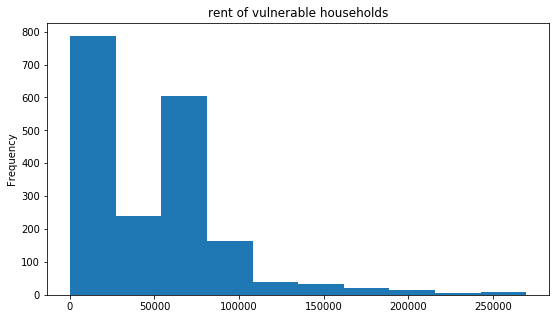

In [28]:
plt.figure(figsize=(9,5))
x3.plot(kind ="hist") 
plt.title('rent of vulnerable households')

Text(0.5, 1.0, 'rent of non vulnerable households')

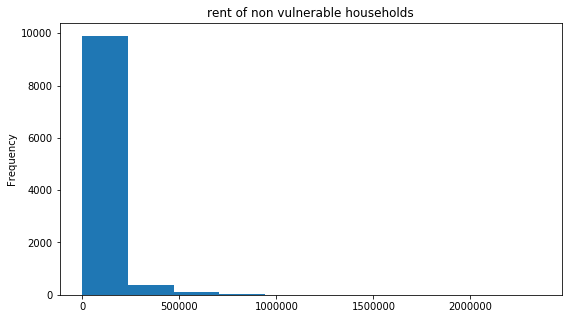

In [29]:
plt.figure(figsize=(9,5))
x4.plot(kind ="hist") 
plt.title('rent of non vulnerable households')

In [30]:
#rent column analysed
data_hos.shape

(17999, 143)

In [31]:
#removing the unbalanced data with more null values in target column and other features

In [32]:
x_test_null=data_hos[data_hos.Target.isnull()]

In [33]:
#x_test_null

In [34]:
data1=data_hos.drop(index=x_test_null.index.values.tolist())

In [35]:
data1.Target.isnull().sum()

0

In [36]:
data1.isnull().sum()

Id                    0
v2a1                164
hacdor             5290
rooms              5660
hacapo              165
                   ... 
SQBovercrowding      20
SQBdependency        20
SQBmeaned            30
agesq                13
Target                0
Length: 143, dtype: int64

In [37]:
data1.shape

(16034, 143)

In [38]:
#data1.head(20)

In [39]:
data_null=pd.DataFrame(data1.isnull().sum())
data_null.to_excel("data1_null.xls")

In [40]:
data1["hacdor"].isnull().sum()

5290

In [41]:
data1["bedrooms"].isnull().sum()

0

In [42]:
#filling null values in rooms column

In [43]:
data1["rooms"].isnull().sum()

5660

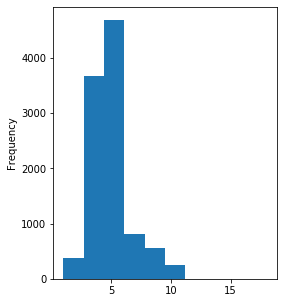

In [44]:
plt.figure(figsize=(4,5))
data1['rooms'].plot(kind ="hist") 

Text(0.5, 1.0, 'Number of rooms in extreme poverty')

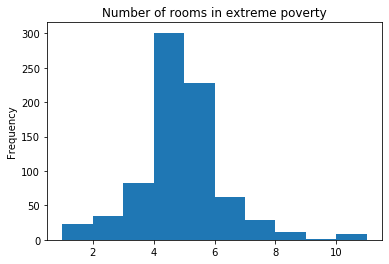

In [45]:

x1=data1["rooms"][data1["Target"]==1]
x1.plot(kind ="hist") 
plt.title('Number of rooms in extreme poverty')

Text(0.5, 1.0, 'Number of rooms in moderate poverty  ')

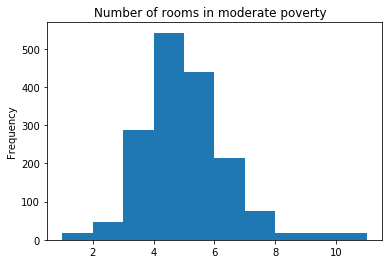

In [46]:
x1=data1["rooms"][data1["Target"]==2]
x1.plot(kind ="hist") 
plt.title('Number of rooms in moderate poverty  ')

Text(0.5, 1.0, 'Number of rooms in   vulnerable households ')

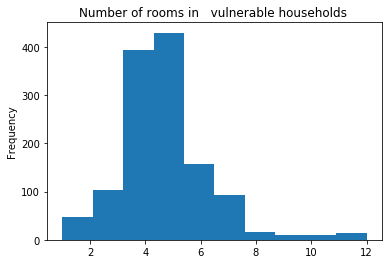

In [47]:
x1=data1["rooms"][data1["Target"]==3]
x1.plot(kind ="hist") 
plt.title('Number of rooms in   vulnerable households ')

Text(0.5, 1.0, 'Number of rooms in non-vulnerable households ')

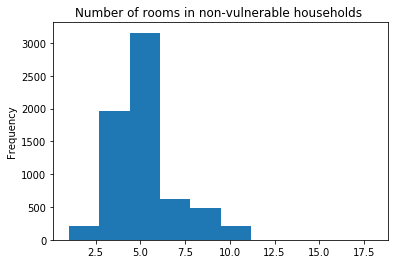

In [48]:
x1=data1["rooms"][data1["Target"]==4]
x1.plot(kind ="hist") 
plt.title('Number of rooms in non-vulnerable households ')

In [49]:
print('Avg number of rooms in extreme poverty=',  data1["rooms"][data_hos['Target']==1].mean())
print('Avg number of rooms in  moderate poverty=',  data1["rooms"][data_hos['Target']==2].mean())
print('Avg number of rooms in vulnerable households= ',  data1["rooms"][data_hos['Target']==3].mean())
print('Avg number of rooms in non vulnerable households = ',  data1["rooms"][data_hos['Target']==4].mean())


Avg number of rooms in extreme poverty= 4.423273657289003
Avg number of rooms in  moderate poverty= 4.570238095238095
Avg number of rooms in vulnerable households=  4.853792025019547
Avg number of rooms in non vulnerable households =  5.322930800542741


In [50]:
data1.loc[(data_hos["rooms"].isnull()) &(data1["Target"]==1),"rooms"]=4
data1.loc[(data_hos["rooms"].isnull()) &(data1["Target"]==2),"rooms"]=5
data1.loc[(data_hos["rooms"].isnull()) &(data1["Target"]==3),"rooms"]=5
data1.loc[(data_hos["rooms"].isnull()) &(data1["Target"]==4),"rooms"]=6


In [51]:
data1["rooms"].isnull().sum()

0

In [52]:
#null values of rooms are filled based on Target variable

In [53]:
data1["hacdor"].isnull().sum()

5290

In [54]:
data1["overcrowding"].isnull().sum()

0

In [55]:
act = pd.DataFrame(data1['v18q1'])
act['one'] = 1
act.groupby('v18q1').sum().reset_index()

,v18q1,one
0,1.0,2677
1,2.0,1513
2,3.0,1188
3,4.0,1045
4,5.0,1083
5,6.0,1078


In [56]:
# From the count "0" is missing.Here the "0" values in number of tablets are given as null values.So replacing null values with "0"

In [57]:
data1['v18q1'].fillna(0,inplace=True)

In [58]:
data1["v18q1"].isnull().sum()

0

In [59]:
#filling the null values in rez_esc, Years behind in school.

In [60]:
data1['rez_esc'].dropna().value_counts()

0.0    2265
1.0    1316
3.0    1165
2.0    1147
4.0    1130
5.0    1051
Name: rez_esc, dtype: int64

In [61]:
#Here we actually have values of the '0'.So we should check for the data deeper

In [62]:
data1.loc[pd.notnull(data1['rez_esc']),('age')].describe()

count    8064.000000
mean       30.667907
std        21.516091
min         0.000000
25%        13.000000
50%        25.000000
75%        47.000000
max        97.000000
Name: age, dtype: float64

In [63]:
#since we do not get proper pattern on finding the missing values in column we are dropping the column "rez_esc"

In [64]:
del data1["rez_esc"]

In [65]:
#finding null values in hacdor.

In [66]:
#removing unwanted columns which are repeating the same data.
#r4m3-Removing it since it gives the same female count.
#r4h3-Removing it since it gives the same male count.
#r4t1-Removing it since it gives the same data from total male and female count below 12yrs.
#r4t2-Removing it since it gives the same data from total male and female count above 12yrs.
#Id-identification of person is removed.
#idhogar it is household level identifier it is also removed.
del data1["r4m3"]
del data1["r4h3"]
del data1["r4t1"]
del data1['r4t2']
del data1["Id"]
del data1['idhogar']



In [67]:
data1.shape

(16034, 136)

In [68]:
data1_null=pd.DataFrame(data1.isnull().sum())
data1_null.to_excel("data1_null_new.xls")

In [69]:
data1.isnull().sum()

v2a1                164
hacdor             5290
rooms                 0
hacapo              165
v14a                 47
                   ... 
SQBovercrowding      20
SQBdependency        20
SQBmeaned            30
agesq                13
Target                0
Length: 136, dtype: int64

In [70]:
#rectifying decimal values in overcrowding 
data1["overcrowding"]=np.where(data1["overcrowding"].between(0,1),0,data1["overcrowding"])
data1["overcrowding"]=np.where(data1["overcrowding"].between(1,2),1,data1["overcrowding"])
data1["overcrowding"]=np.where(data1["overcrowding"].between(2,3),2,data1["overcrowding"])
data1["overcrowding"]=np.where(data1["overcrowding"].between(3,4),3,data1["overcrowding"])
data1["overcrowding"]=np.where(data1["overcrowding"].between(4,5),4,data1["overcrowding"])
data1["overcrowding"]=np.where(data1["overcrowding"].between(5,6),5,data1["overcrowding"])
data1["overcrowding"]=np.where(data1["overcrowding"].between(6,7),6,data1["overcrowding"])

In [71]:
# Filling null values in hacdor 

In [72]:
hacdor= pd.DataFrame(zip(data1.bedrooms, data1.overcrowding, data1.hacdor))

In [73]:
hacdor

,0,1,2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,2.0,0.0,0.0
3,3.0,1.0,0.0
4,3.0,1.0,0.0
...,...,...,...
16029,3.0,0.0,NaN
16030,3.0,0.0,NaN
16031,2.0,1.0,NaN
16032,2.0,1.0,NaN


In [74]:
data1['r4t3'].isnull().sum()

77

In [75]:
hacdor_null=hacdor[hacdor[2].isnull()]

In [76]:
hacdor_null

,0,1,2
9774,3.0,0.0,NaN
9775,3.0,0.0,NaN
9776,3.0,0.0,NaN
9777,4.0,0.0,NaN
9778,4.0,0.0,NaN
...,...,...,...
16029,3.0,0.0,NaN
16030,3.0,0.0,NaN
16031,2.0,1.0,NaN
16032,2.0,1.0,NaN


In [77]:
x_test=hacdor_null.iloc[:,[0,1]].values
x_test

array([[3., 0.],
       [3., 0.],
       [3., 0.],
       ...,
       [2., 1.],
       [2., 1.],
       [2., 1.]])

In [78]:
hacdor_notnull=hacdor[hacdor[2].notnull()]

In [79]:
hacdor_notnull

,0,1,2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,2.0,0.0,0.0
3,3.0,1.0,0.0
4,3.0,1.0,0.0
...,...,...,...
14038,4.0,1.0,1.0
14039,4.0,1.0,1.0
14040,4.0,1.0,1.0
14041,4.0,1.0,1.0


In [80]:
x=hacdor_notnull.iloc[:,[0,1]].values
y=hacdor_notnull.iloc[:,2].values

In [81]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split( 
        x, y, test_size = 0.3, random_state = 0) 

In [82]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(xtrain, ytrain)

C:\Users\DS7_ASivaram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
#predictions
Predictions = logmodel.predict(xtest)

In [84]:
#model evalution

from sklearn.metrics import classification_report
print(classification_report(ytest,Predictions))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      2992
         1.0       0.94      0.19      0.32       232

    accuracy                           0.94      3224
   macro avg       0.94      0.60      0.65      3224
weighted avg       0.94      0.94      0.92      3224



In [85]:
#confusion matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, Predictions))

[[2989    3]
 [ 187   45]]


In [86]:
Hac_pre = logmodel.predict(x_test)

In [87]:
Hac_pre

array([0., 0., 0., ..., 0., 0., 0.])

In [88]:
overcrowding_null = pd.DataFrame(Hac_pre)

<Figure size 288x360 with 0 Axes>

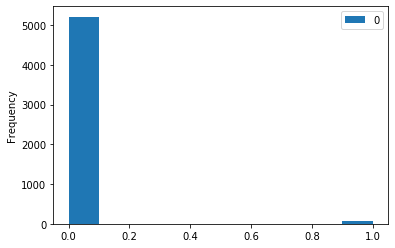

In [89]:
plt.figure(figsize=(4,5))
overcrowding_null.plot(kind ="hist") 

In [90]:
#since more than 99% of null values are 0 filling the null values as zero in hacdor

In [91]:
data1.isnull().sum()

v2a1                164
hacdor             5290
rooms                 0
hacapo              165
v14a                 47
                   ... 
SQBovercrowding      20
SQBdependency        20
SQBmeaned            30
agesq                13
Target                0
Length: 136, dtype: int64

In [92]:
data1["hacdor"].fillna(0,inplace=True)

In [93]:
data1["hacdor"].isnull().sum()

0

In [94]:
data1.isnull().sum()

v2a1               164
hacdor               0
rooms                0
hacapo             165
v14a                47
                  ... 
SQBovercrowding     20
SQBdependency       20
SQBmeaned           30
agesq               13
Target               0
Length: 136, dtype: int64

In [95]:
data_nulllast=pd.DataFrame(data1.isnull().sum())
data_nulllast.to_excel("data1_nulllast.xls")

In [96]:
data1["v2a1"].isnull().sum()

164

In [97]:
data1["v2a1"].mean()

57979.7872715816

In [98]:
#filling balance null values with the mean

In [99]:
data1["v2a1"].fillna(57980,inplace=True)

In [100]:
data1["v2a1"].isnull().sum()

0

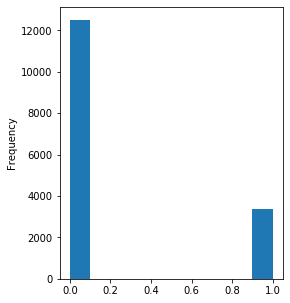

In [101]:
plt.figure(figsize=(4,5))
data1["hacapo"].plot(kind ="hist") 

In [102]:
#filling the null values which are less than 5% with frequent value in column

data1["hacapo"].fillna(0,inplace=True)

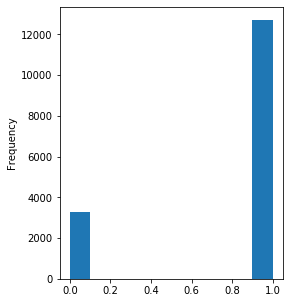

In [103]:
plt.figure(figsize=(4,5))
data1["v14a"].plot(kind ="hist") 

In [104]:
data1["v14a"].fillna(1,inplace=True)

In [105]:
data1.loc[(pd.isnull(data1['v18q']) & data1['v18q1']>0), 'v18q'] = 1

In [106]:
data1["v18q"].isnull().sum()

28

In [107]:
data1["v18q"].fillna(0,inplace=True)

In [108]:
data1["r4m1"].fillna(0,inplace=True)
data1["r4m2"].fillna(0,inplace=True)

In [109]:
#data1.loc[(pd.isnull(data1["r4t3"]),'r4t3'] = data1.r4h3 + data1.r4m3
           
data1['r4t3'].fillna(data1.r4h1 + data1.r4h2+data1.r4m1 + data1.r4m2,inplace=True)           

In [110]:
data1["r4t3"].isnull().sum()

0

In [111]:
data1["tamhog"].mode()

0    4.0
dtype: float64

In [112]:
data1["tamhog"].fillna(4,inplace=True)

In [113]:
data1["tamviv"].mode()

0    4.0
dtype: float64

In [114]:
data1["tamviv"].fillna(4,inplace=True)

In [115]:
data1["escolari"].mode()

0    11.0
dtype: float64

In [116]:
data1["escolari"].fillna(11,inplace=True)

In [117]:
data1["hhsize"].mode()

0    4.0
dtype: float64

In [118]:
data1["hhsize"].fillna(4,inplace=True)

In [119]:
data1["meaneduc"].mode()

0    6.0
dtype: float64

In [120]:
data1["meaneduc"].fillna(6,inplace=True)

In [121]:
#tipovivi1,2,3,4,5 
data1["tipovivi5"].fillna(0,inplace=True)


In [122]:
#computer,#television,#mobilephone,#qmobilephone null values filled with 0 since they are less than 1%
data1["qmobilephone"].fillna(0,inplace=True)

In [123]:
#lugar1,#lugar2,#lugar3,#lugar4,lugar5
data1["lugar5"].fillna(0,inplace=True)

In [124]:
data1["age"].mode()

0    23.0
dtype: float64

In [125]:
data1["age"].fillna(23,inplace=True)

In [126]:
#now deleting the squared values since it gives the same data repetedly from another column.


del data1["SQBescolari"]
del data1["SQBage"]
del data1["SQBhogar_total"]
del data1["SQBedjefe"]
del data1["SQBhogar_nin"]
del data1["SQBovercrowding"]
del data1["SQBdependency"]
del data1["SQBmeaned"]
del data1["agesq"]


In [127]:
data1.shape

(16034, 127)

In [128]:
final_data=pd.DataFrame(data1.isnull().sum())
final_data.to_excel("final_data.xls")

In [129]:
data1["dependency"]

0         no
1          8
2          8
3        yes
4        yes
        ... 
16029    yes
16030    yes
16031    0.5
16032    0.5
16033    0.5
Name: dependency, Length: 16034, dtype: object

In [130]:

data1["dependency"]=data1["dependency"].replace({"yes":1,"no":0})

In [131]:
data1["edjefe"]=data1["edjefe"].replace({"yes":1,"no":0})
data1["edjefa"]=data1["edjefa"].replace({"yes":1,"no":0})

In [132]:
data1["dependency"]

0          0
1          8
2          8
3          1
4          1
        ... 
16029      1
16030      1
16031    0.5
16032    0.5
16033    0.5
Name: dependency, Length: 16034, dtype: object

# NULL VALUES ARE FILLED COMPLETELY IN GIVEN DATASET

In [133]:

MODEL_data=pd.DataFrame(data1)
MODEL_data.to_excel("MODEL_data.xls")



In [134]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(data1))
data1.head()

MinMaxScaler(copy=True, feature_range=(0, 1))


,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
0,190000.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,43.0,4.0
1,135000.0,0.0,4.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,67.0,4.0
2,0.0,0.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,92.0,4.0
3,180000.0,0.0,5.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.0,4.0
4,180000.0,0.0,5.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37.0,4.0


In [135]:
data1.isnull().sum()

v2a1      0
hacdor    0
rooms     0
hacapo    0
v14a      0
         ..
lugar6    0
area1     0
area2     0
age       0
Target    0
Length: 127, dtype: int64

In [136]:
#f = plt.figure(figsize=(19, 15))
#plt.matshow(data1.corr(), fignum=f.number)
#plt.xticks(range(data1.shape[1]), data1.columns, fontsize=14, rotation=45)
#plt.yticks(range(data1.shape[1]), data1.columns, fontsize=14)
#cb = plt.colorbar()
#cb.ax.tick_params(labelsize=14)
#plt.title('Correlation Matrix', fontsize=16);


In [137]:
#sns.heatmap(data1.isnull(), cbar=False)


heatmap

In [138]:
data1.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
0,190000.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,43.0,4.0
1,135000.0,0.0,4.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,67.0,4.0
2,0.0,0.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,92.0,4.0
3,180000.0,0.0,5.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.0,4.0
4,180000.0,0.0,5.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37.0,4.0


In [139]:
data1.shape

(16034, 127)

In [140]:
data1=data1.dropna(axis = 0, how ='any') 

In [141]:
col = data1.columns.tolist()

In [142]:
y= data1.drop(columns=col[:-1])
x=data1.drop(columns=col[-1])

In [143]:
y

,Target
0,4.0
1,4.0
2,4.0
3,4.0
4,4.0
...,...
16029,2.0
16030,2.0
16031,1.0
16032,1.0


In [144]:
x

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age
0,190000.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,43.0
1,135000.0,0.0,4.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,67.0
2,0.0,0.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,92.0
3,180000.0,0.0,5.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,...,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.0
4,180000.0,0.0,5.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,...,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16029,57127.0,0.0,5.0,1.0,0.0,0.0,0.0,3.0,3.0,6.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0
16030,49666.0,0.0,5.0,0.0,0.0,0.0,0.0,3.0,3.0,4.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0
16031,71402.0,0.0,4.0,0.0,1.0,1.0,1.0,1.0,5.0,3.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0
16032,62972.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,7.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,22.0


In [145]:
print(x.shape)
print(y.shape)

(16013, 126)
(16013, 1)


In [146]:
123abc

SyntaxError: invalid syntax (<ipython-input-146-b63c7c3a7543>, line 1)

# modeling imbalanced dataset

In [ ]:
##getting the count of each class


In [147]:
extreme_poverty =data1[data1["Target"]==1]
moderate_poverty =data1[data1["Target"]==2]
vulnerable_households=data1[data1["Target"]==3]
non_vulnerable_households=data1[data1["Target"]==4]

In [148]:
print("extreme_poverty= " ,extreme_poverty.shape,"moderate_poverty= " ,moderate_poverty.shape,"vulnerable_households= " ,vulnerable_households.shape)
print("non_vulnerable_households= " ,non_vulnerable_households.shape)

extreme_poverty=  (1155, 127) moderate_poverty=  (2500, 127) vulnerable_households=  (1942, 127)
non_vulnerable_households=  (10416, 127)


In [149]:
import imblearn

In [150]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss



In [151]:
#implementing oversampling for handling imbalanced
smk=SMOTETomek(random_state=42)
x_res,y_res=smk.fit_sample(x,y)

C:\Users\DS7_ASivaram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [152]:
x_res.shape,y_res.shape

((39828, 126), (39828,))

In [155]:
from collections import Counter
print("extreme_poverty= " ,extreme_poverty.shape,"moderate_poverty= " ,moderate_poverty.shape,"vulnerable_households= " ,vulnerable_households.shape)
print("non_vulnerable_households= " ,non_vulnerable_households.shape)
print("Resampled dataset shape {}".format(Counter(y_res)))

extreme_poverty=  (1155, 127) moderate_poverty=  (2500, 127) vulnerable_households=  (1942, 127)
non_vulnerable_households=  (10416, 127)
Resampled dataset shape Counter({1.0: 10063, 2.0: 9995, 3.0: 9974, 4.0: 9796})


# MODEL IN RANDOM FOREST

In [160]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.20)

In [161]:
print('Train cases as below')
print('X_train shape: ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',x_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (31862, 126)
y_train shape:  (31862,)

Test cases as below
X_test shape:  (7966, 126)
y_test shape:  (7966,)


In [162]:
from sklearn.ensemble import RandomForestClassifier
modelrf =RandomForestClassifier()
modelrf.fit(x_train, y_train)

C:\Users\DS7_ASivaram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [163]:
y_predict=modelrf.predict(x_test,)
y_predict

array([3., 2., 1., ..., 4., 3., 3.])

In [164]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[1965   31   12   18]
 [  57 1798  125   24]
 [  43  129 1756   36]
 [   6   25   17 1924]]
              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96      2026
         2.0       0.91      0.90      0.90      2004
         3.0       0.92      0.89      0.91      1964
         4.0       0.96      0.98      0.97      1972

    accuracy                           0.93      7966
   macro avg       0.93      0.93      0.93      7966
weighted avg       0.93      0.93      0.93      7966



# IMPORTANT FEATURES

In [165]:
features = x_train.columns
import_features = modelrf.feature_importances_
top_features = pd.DataFrame([f for f in zip (features, import_features)], columns = ["Feature","Importance"]).nlargest(20,"Importance")
top_features.sort_values(by = "Importance", inplace = True)
plt.figure(figsize=(10,6))
plt.barh(range(len(top_features)), top_features.Importance, align = 'center', alpha = 0.9)
plt.yticks(range(len(top_features)),top_features.Feature)
plt.xlabel('DEPENDENT RATE')
plt.title('Top Features from Random Forest')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

# MODEL ON NAIVE BAYES 

In [166]:
!pip install xgboost

In [167]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB


In [168]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.20)

In [169]:
modelnb = GaussianNB()
modelnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [170]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[547 521 487 473]
 [534 459 485 491]
 [479 516 457 506]
 [511 487 481 532]]
              precision    recall  f1-score   support

         1.0       0.26      0.27      0.27      2028
         2.0       0.23      0.23      0.23      1969
         3.0       0.24      0.23      0.24      1958
         4.0       0.27      0.26      0.27      2011

    accuracy                           0.25      7966
   macro avg       0.25      0.25      0.25      7966
weighted avg       0.25      0.25      0.25      7966



In [171]:
#ADABOOST CLASSIFICATION MODEL

In [172]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [173]:
from sklearn.ensemble import AdaBoostClassifier
modelab = AdaBoostClassifier(n_estimators = 50, learning_rate = 1, random_state = 200)
modelab.fit(x_train, y_train)
#yadaclas = modelab.predict(x_test)

C:\Users\DS7_ASivaram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=50, random_state=200)

In [174]:
y_predict=modelab.predict(x_test,)
y_predict

array([4., 2., 4., ..., 4., 4., 4.])

In [175]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[  73   72    6   85]
 [  42  213   38  180]
 [  15  125   50  189]
 [  25   85   25 1980]]
              precision    recall  f1-score   support

         1.0       0.47      0.31      0.37       236
         2.0       0.43      0.45      0.44       473
         3.0       0.42      0.13      0.20       379
         4.0       0.81      0.94      0.87      2115

    accuracy                           0.72      3203
   macro avg       0.53      0.46      0.47      3203
weighted avg       0.69      0.72      0.69      3203

